In [73]:
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import numpy as np
import scipy
from numpy import linalg as LA

      Iter       Train Loss   Remaining Time 
         1           1.0190            7.85s
         2           0.9192            7.49s
         3           0.8272            7.36s
         4           0.7834            7.27s
         5           0.7109            7.14s
         6           0.6368            7.03s
         7           0.5797            6.96s
         8           0.5610            6.96s
         9           0.5185            7.01s
        10           0.4984            7.00s
        20           0.1999            6.55s
        30           0.1313            6.22s
        40           0.0790            5.92s
        50           0.0511            5.63s
        60           0.0352            5.35s
        70           0.0245            5.07s
        80           0.0162            4.78s
        90           0.0114            4.50s
       100           0.0077            4.23s
       200           0.0002            1.46s


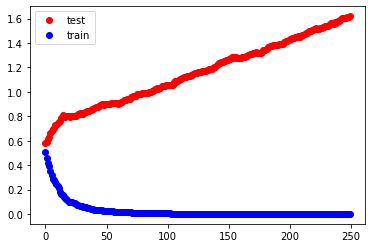

      Iter       Train Loss   Remaining Time 
         1           1.1255            7.27s
         2           1.0035            7.44s
         3           0.9386            7.31s
         4           0.8844            7.27s
         5           0.8381            7.29s
         6           0.7995            7.23s
         7           0.7559            7.14s
         8           0.7205            7.08s
         9           0.6958            7.10s
        10           0.6725            7.03s
        20           0.4672            6.56s
        30           0.3179            6.22s
        40           0.2274            6.11s
        50           0.1774            5.96s
        60           0.1394            5.78s
        70           0.1050            5.43s
        80           0.0805            5.08s
        90           0.0650            4.75s
       100           0.0511            4.43s
       200           0.0058            1.48s


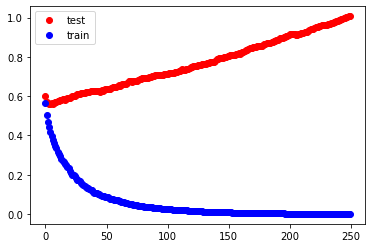

      Iter       Train Loss   Remaining Time 
         1           1.2095            7.78s
         2           1.1006            8.56s
         3           1.0240            8.72s
         4           0.9729            8.35s
         5           0.9387            8.09s
         6           0.8948            7.86s
         7           0.8621            7.70s
         8           0.8360            7.70s
         9           0.8171            7.60s
        10           0.7883            7.48s
        20           0.6029            7.05s
        30           0.4760            7.04s
        40           0.3879            6.72s
        50           0.3325            6.25s
        60           0.2759            5.83s
        70           0.2304            5.46s
        80           0.1969            5.12s
        90           0.1718            4.85s
       100           0.1404            4.65s
       200           0.0358            1.53s


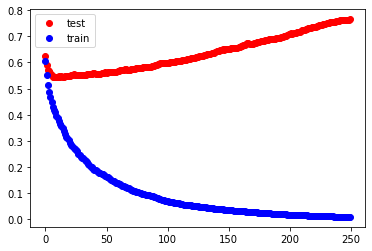

      Iter       Train Loss   Remaining Time 
         1           1.2613            8.22s
         2           1.1715            7.92s
         3           1.1009           10.56s
         4           1.0529           11.61s
         5           1.0130           12.10s
         6           0.9740           13.29s
         7           0.9475           13.32s
         8           0.9197           13.00s
         9           0.8979           13.27s
        10           0.8730           12.96s
        20           0.7207           11.11s
        30           0.6055           10.76s
        40           0.5244           10.43s
        50           0.4501            9.41s
        60           0.3908            8.58s
        70           0.3372            7.83s
        80           0.3009            7.28s
        90           0.2603            6.77s
       100           0.2327            6.15s
       200           0.0835            1.72s


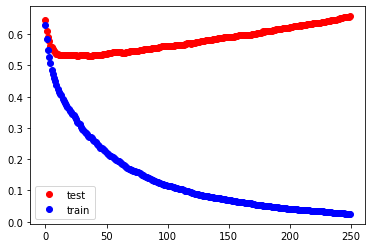

36 0.5301645204906471
      Iter       Train Loss   Remaining Time 
         1           1.3199            7.14s
         2           1.2645            7.26s
         3           1.2170            7.45s
         4           1.1775            7.42s
         5           1.1404            7.28s
         6           1.1106            7.19s
         7           1.0844            7.11s
         8           1.0617            7.06s
         9           1.0411            7.08s
        10           1.0223            7.09s
        20           0.8864            6.67s
        30           0.7844            6.31s
        40           0.7176            6.00s
        50           0.6590            5.69s
        60           0.6120            5.40s
        70           0.5599            5.11s
        80           0.5242            4.82s
        90           0.4829            4.53s
       100           0.4473            4.24s
       200           0.2379            1.40s


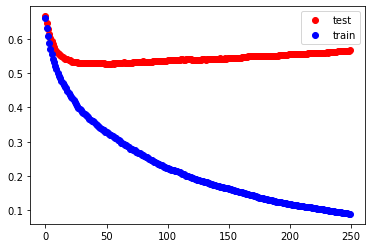

In [75]:
# 1. Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). 
# В первой колонке файла с данными записано, была или нет реакция. 
# Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. 
# Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.

from sklearn.model_selection import train_test_split

data = pd.read_csv('gbm-data.csv').values
y = data[:,0]
X = data[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)
                                    
# 2. Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:
#   • Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.
#   • Преобразуйте полученное предсказание по формуле 1/(1+exp(-y_pred)), где y_pred — предсказанное значение.
#   • Вычислите и постройте график значений log-loss на обучающей и тестовой выборках, 
#   а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss

LR = np.array([1, 0.5, 0.3, 0.2, 0.1])

def learn(learning_rate, X_train, y_train, X_test, y_test, n_est):
	gbc = GradientBoostingClassifier(n_estimators=n_est, verbose=True, random_state=241, learning_rate=learning_rate)
	gbc.fit(X_train, y_train)

	test_score = list(range(n_est))
	train_score = list(range(n_est))

	for i, predictions in enumerate(gbc.staged_decision_function(X_test)):
		predictions = [x[0] for x in predictions.tolist()] 
		predictions = [1/(1 + np.exp(-x)) for x in predictions]
		test_score[i] = log_loss(y_test, predictions)

	for i, predictions in enumerate(gbc.staged_decision_function(X_train)):
		predictions = [x[0] for x in predictions.tolist()] 
		predictions = [1/(1 + np.exp(-x)) for x in predictions]
		train_score[i] = log_loss(y_train, predictions)

	plt.figure()
	plt.plot(test_score, 'r', linewidth=0, marker = 'o')
	plt.plot(train_score, 'b', linewidth=0, marker = 'o')
	plt.legend(['test', 'train'])
	plt.show()
	
	if learning_rate==0.2:
		k = np.argmin(test_score)
		print(k, test_score[k])

	return train_score, test_score


for lr in LR:
	learn(lr, X_train, y_train, X_test, y_test, 250)
    

In [76]:
from time import process_time
start = process_time()
a = np.zeros(10)
for i in range(10):
    a[i]=10
end = process_time()

t1 = end - start

In [77]:
start = process_time()
a = []
for i in range(10):
    a.append(10)
end = process_time()

t2 = end - start

In [78]:
print(t1/t2)

1.813084110620336


In [79]:
# 3. Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: 
# переобучение (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting.

print('overfitting')

# 4. Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2.

k_amin = 36
min_test = 0.5301645204906471

# 5. На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, 
# на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, 
# random_state=241 и остальными параметрами по умолчанию. 
# Какое значение log-loss на тесте получается у этого случайного леса? 
# (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. 
# В данном случае брать сигмоиду от оценки вероятности класса не нужно)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=k_amin, random_state=241)
rfc.fit(X_train, y_train)
y_pred = rfc.predict_proba(X_test)
log_loss(y_test, y_pred)

overfitting


0.5415685811957381